This notebook explores how the same noisy data affects results with random starting fields of Q and P
- patch integration for * components
- 10 integration points per side of a square 
- random data sets
- random starting fields
- gauss post process

date: 2nd Feb 2021

In [13]:
npart = 1
in_order = 2
in_k = -3

In [14]:
# Change according to the problem
max_p = 1
max_grad_p = 3.2
in_range = 3.3

# Check location

In [15]:
print('Working directory: ')
!pwd 
print('\n.med file to use: ')
!ls ./../../../*.cub
print('\nparam_file.petsc :')
!cat param_file.petsc

Working directory: 
/Users/adriana/Documents/Meshes_for_DD/2021/square_ana_2D/noise_linear/dense_rand_seed_ran_fields/noise_ord_2

.med file to use: 
./../../../square_ana_2D_QUAD_coarse.cub
./../../../square_ana_2D_QUAD_dense.cub
./../../../square_ana_2D_TRI.cub

param_file.petsc :
-my_order 1
-my_dummy_k -3
-my_dummy_range 4
-my_dummy_count 100000
-my_dummy_noise 0.1

-pc_type lu
-pc_factor_mat_solver_package mumps
-ksp_type fgmres
-ksp_monitor
-ksp_converged_reason
-ksp_rtol 1e-8
-ksp_atol 1e-8



# Run begging analysis

In [16]:

# !read_med -med_file *.med
!mofem_part -my_file ./../../../square_ana_2D_QUAD_dense.cub -output_file input_mesh.h5m -my_nparts {npart} -dim 2 -adj_dim 1
# !mpirun -np {npart} poisson_H -file_name input_mesh.h5m -my_order 1

[0] <inform> MoFEM version 0.10.0 (MOAB 5.1.0 Petsc Release Version 3.11.3, Jun, 26, 2019 )
[0] <inform> git commit id 7b8b4da82dda39a135ba950aefd01ca29b43f1b7
[0] <inform> Local time: 2021-2-9 12:25:45
[0] <inform> UTC time: 2021-2-9 12:25:45
[0] <inform> [MeshsetsManager] read cubit meshset 12682136550675316746 type BLOCKSET UNKNOWNNAME msId 1 name BOUNDARY_CONDITION block header:  blockCol = 4294967295 blockMat = 0 blockDimension = 1
[0] <inform> [mofem_part] meshset 12682136550675316746 type BLOCKSET UNKNOWNNAME msId 1 name BOUNDARY_CONDITION block header:  blockCol = 4294967295 blockMat = 0 blockDimension = 1
[0] <inform> [ProblemsManager] Finite elements in problem: row lower 0 row upper 2500 nb. elems 2500 ( 2500 )


# !! Check/select input values (change according to problem set up) !!

# Run sample analysis

In [17]:
# # in_order = 2
# in_k = -3
# # in_range = 4
# in_count = 10000
# in_noise = 0.01

# !rm sumanalys.csv

# !mpirun -np {npart} poisson_dd_H -file_name input_mesh.h5m -my_order {in_order} -my_dummy_k {in_k} -my_dummy_range {in_range} -my_dummy_count {in_count} -my_dummy_noise {in_noise}

# !mv ./sumanalys.csv ./sampleAna.csv

In [18]:
# !mkdir output_sample
# !mv out* ./output_sample/
# !mv dummy_tree.csv ./output_sample/
# !mv sampleAna.csv ./output_sample/
# !cd output_sample && convert.py -np {npart} out*

# Load classes, definitions, etc.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

import sys
sys.path.insert(1, '/Users/adriana/Documents/Meshes_for_DD/python_plot_func')
from plotting_for_DD import plot_dd_ana
naming = ["order", "gaussnum", "datanum", "dummy_noise", "p_difference", "dummy_range", "rmsErr", "rmsPoiErr", "Vol", "iterations"]

In [20]:
class MyAnalysis:
    def __init__(self):
        self.varName = 'unidentified'
        d1 = pd.DataFrame()
        d2 = pd.DataFrame()
        d3 = pd.DataFrame()
        d4 = pd.DataFrame()
        d5 = pd.DataFrame()
        d6 = pd.DataFrame()
        d7 = pd.DataFrame()
        d8 = pd.DataFrame()
        d9 = pd.DataFrame()
        self.variable = []
        self.csvNaming = []
        self.list = []
        self.data_list = [d1,d2,d3,d4,d5,d6,d7,d8,d9]

# !! Analysis set up (this is the main part to change) !!

In [21]:
noiseAna = MyAnalysis()

# list analysis name with desired changin variable
noiseAna.varName = 'noise'
# noiseAna.list.append(['AS_noiseAna00', 0])
# noiseAna.list.append(['AS_noiseAna0005', 0.005])
# noiseAna.list.append(['AS_noiseAna001', 0.01])
# noiseAna.list.append(['AS_noiseAna005', 0.05])
noiseAna.list.append(['AS_noiseAna01', 0.1])
# noiseAna.list.append(['AS_noiseAna02', 0.2])

# populate the required fields
for i in range(0,len(noiseAna.list)):
    noiseAna.csvNaming.append(noiseAna.list[i][0])
    noiseAna.variable.append(float(noiseAna.list[i][1]))

#  just a check
print('variable name: ' + noiseAna.varName)
print('naming: ' + str(noiseAna.csvNaming))
print('variables: ' + str(noiseAna.variable))

variable name: noise
naming: ['AS_noiseAna01']
variables: [0.1]


# !! Run Analysis (update to which variable is changing) !!

In [11]:
test = input("1 = run analysis; 0 = skip analysis")
test_int = int(test)
if test_int == 1:
    # comment changing variables
    # in_order = 2
    # in_k = -3
    # in_range = 4 # defined above
    # in_count = 10000
    # in_noise = 0
    
    !rm sumanalys.csv # making sure the previous analysis doesn't affect this one

    for a in range(0,len(noiseAna.variable)):
        in_noise = noiseAna.variable[a]
        csvName = noiseAna.csvNaming[a] + '.csv'
        for i in range(6,8): # 10^1 number of points in the data set
            for j in range(1,30): # how many realisations
                in_count = (10**i)
                !mpirun -np {npart} poisson_dd_H -file_name input_mesh.h5m -my_order {in_order} -my_dummy_k {in_k} -my_dummy_range {in_range} -my_dummy_count {in_count} -my_dummy_noise {in_noise} -skip_vtk 1
        !mv ./sumanalys.csv ./{csvName}

# Postprocess Analysis

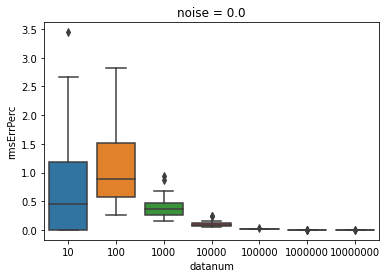

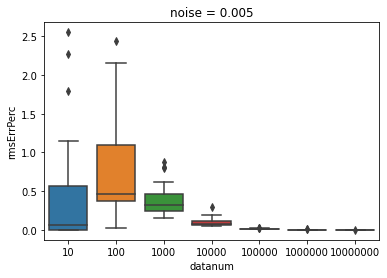

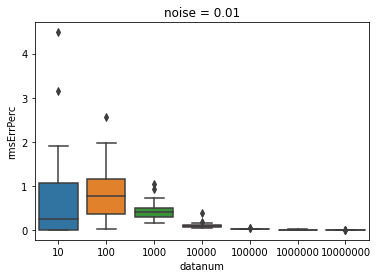

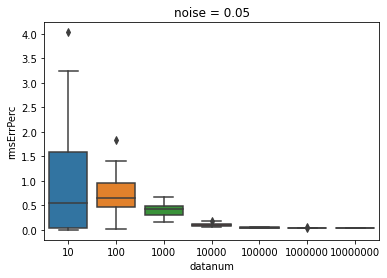

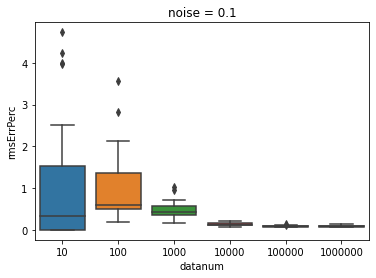

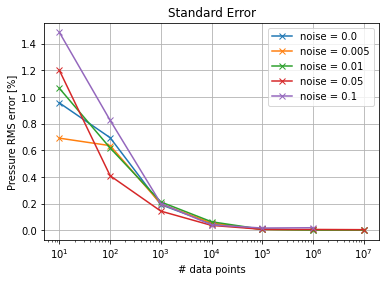

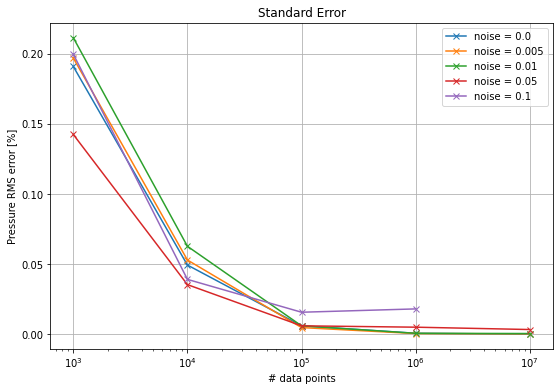

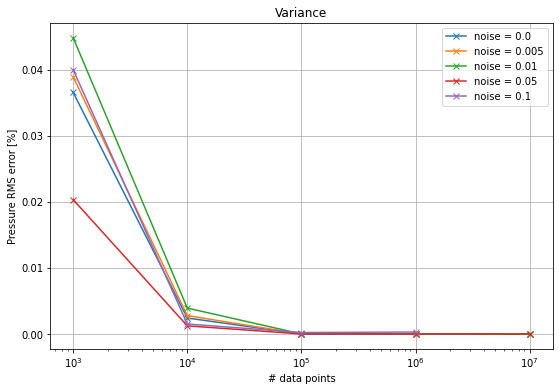

In [12]:
analysis = noiseAna
# move to after analysis was run
for a in range(0,len(analysis.variable)):
    analysis.data_list[a] = pd.read_csv(analysis.csvNaming[a]+'.csv', header=None, names=naming)
    analysis.data_list[a]["justErr"] = abs(analysis.data_list[a].p_difference)
    analysis.data_list[a]["rmsErrPerc"] = analysis.data_list[a].rmsErr/max_p*100


plot_dd_ana(analysis, 'rmsErrPerc', 'std', 1, fig_size = [6,4])
plot_dd_ana(analysis, 'rmsErrPerc', 'std', first_point = 2)
plot_dd_ana(analysis, 'rmsErrPerc', 'var', first_point = 2)

# box_ave(noiseAna, 'iterations')
# box_ave(noiseAna, 'rmsPoiErr')
# box_ave(noiseAna, 'rmsErr')
# box_ave(noiseAna, 'rmsErrPerc',1)